# <center>  Linear Regression</center>


## Import Libraries


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
%matplotlib inline

## Import Dataset

In [21]:
Data=pd.read_csv('Medical Price Dataset.csv')

In [22]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data pre-processing


Converting Categorical values into numerical values.

In [23]:
sex={"male":0,"female":1}
Data.sex=[sex[item] for item in Data.sex]

smoker={"no":0,"yes":1}
Data.smoker=[smoker[item] for item in Data.smoker]

In [24]:
Data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [25]:
region={"southwest":0,"southeast":1,"northwest":2,"northeast":3}
Data.region=[region[item] for item in Data.region]

In [26]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [27]:
Data.region.unique()

array([0, 1, 2, 3], dtype=int64)

In [28]:
correlation = Data.corr()

<AxesSubplot: >

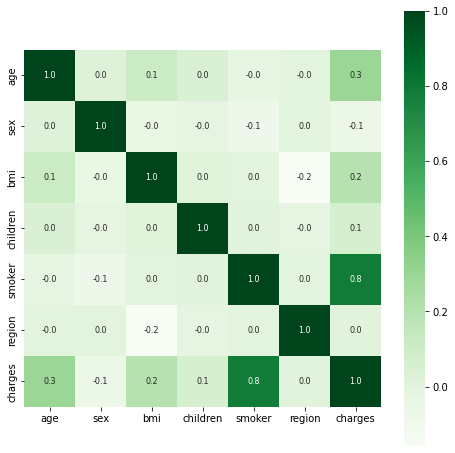

In [29]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

As the correlation between Smoker and chargers are Directly correlated so we will take Smoker as a independent variable and Charges as dependent variable.

In [30]:
print(correlation['charges'])

age         0.299008
sex        -0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region      0.006208
charges     1.000000
Name: charges, dtype: float64


In [31]:
Data.drop(['sex','children','region'],axis='columns',inplace=True)
Data.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [32]:
x_train= Data.iloc[:,:3]
y_train = Data['charges']
x_train

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [33]:
def compute_cost(x, y, w, b): 
    m = len(x) 
    
    total_cost = 0
    cost = 0
    
    for i in range(m):
        f_wb=(w*x.iloc[i][0])+(w*x.iloc[i][1])+(w*x.iloc[i][2])+b
        cost=cost+(f_wb-y[i])**2
        total_cost = 1/(2*m) * cost

    return total_cost

In [34]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 159322141.146


In [35]:
def compute_gradient(x, y, w, b): 
    m = len(x)
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb=(w*x.iloc[i][0])+(w*x.iloc[i][1])+(w*x.iloc[i][2])+b
        dj_dw_i=(f_wb-y[i])*(x.iloc[i][0]*x.iloc[i][1]*x.iloc[i][2])
        dj_db_i=(f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
        
    return dj_dw, dj_db

In [36]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -8631796.04477325 -13270.422265141257


In [37]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    m = len(x)
    
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:     
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history 

In [19]:
initial_w = 0.
initial_b = 0.

# some gradient descent settings 00000000001=161323350.54, 
iterations = 10000             #  0000001    =160462813.70
alpha = .0001                # 00001        =94305848.32

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 1222485830.58   
Iteration 1000: Cost 248506667.29   
Iteration 2000: Cost 246779128.95   
Iteration 3000: Cost 245243944.19   
Iteration 4000: Cost 243896337.23   
Iteration 5000: Cost 242731628.08   
Iteration 6000: Cost 241745230.65   
Iteration 7000: Cost 240932651.11   
Iteration 8000: Cost 240289486.11   
Iteration 9000: Cost 239811421.12   
w,b found by gradient descent: 699.5866011250656 -18271.81074401142


In [38]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] =  (w * x_train.iloc[i][0]) + (w * x_train.iloc[i][1]) + (w * x_train.iloc[i][2]) + b

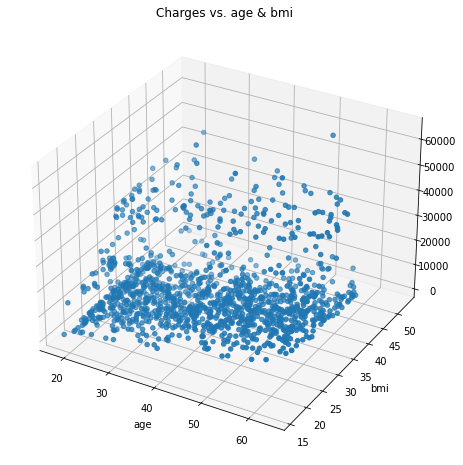

In [39]:
from mpl_toolkits.mplot3d import Axes3D

#took only first 2 columns because third column contain binary values.
column1 = x_train.iloc[:,0]
column2 = x_train.iloc[:,1]

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(column1,column2,y_train) 
plt.title("Charges vs. age & bmi")
plt.ylabel('bmi')
plt.xlabel('age')
plt.show()

In [40]:
type(predicted)

numpy.ndarray

In [41]:
from sklearn.metrics import accuracy_score, r2_score

In [42]:
r2_score(y_train,predicted)

-2.2685948644130223

In [43]:
MSE = np.square(np.subtract(y_train,predicted)).mean()   
   
rsme = math.sqrt(MSE)  
print("Root Mean Square Error:\n")  
print(rsme)  

Root Mean Square Error:

21885.81581704661


The cost and bias of the model is too high right now but we can improve it by optimizing the values of <b>W (weight)</b> and <b>B(bias)</b>. Gradient Descent needs more computation resource to optimize it quickly but my laptop can't able to do it, it taking hours and hours to optimize it. That why the good accuracy can't be achieved and rmse is high too. Hope you will understand.